In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
family <- "ArialMT"
dpi <- 320
fig1_ht <- 5
fig1_wd <- 6

In [4]:
mat_de_bplot_figs <- list()
mat_sig_bplot_figs <- list()
for (idx in 1:3) {
    mat_de_bplot_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_mat_de_bplots.RData"))
    mat_sig_bplot_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_mat_sig_bplots.RData"))
}
mat_de_bplot_figs <- Reduce(c, mat_de_bplot_figs)
mat_sig_bplot_figs <- Reduce(c, mat_sig_bplot_figs)

In [5]:
mat_de_bplot_figs
mat_sig_bplot_figs

[1] "CESC_mat_de_bplot" "UCS_mat_de_bplot"  "UCEC_mat_de_bplot"

[1] "CESC_mat_sig_bplot" "UCS_mat_sig_bplot"  "UCEC_mat_sig_bplot"

In [6]:
hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}

hide_axis_title <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.title.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

hide_axis_text <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.text.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.text.y = element_blank())
    }
    plt
}

set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

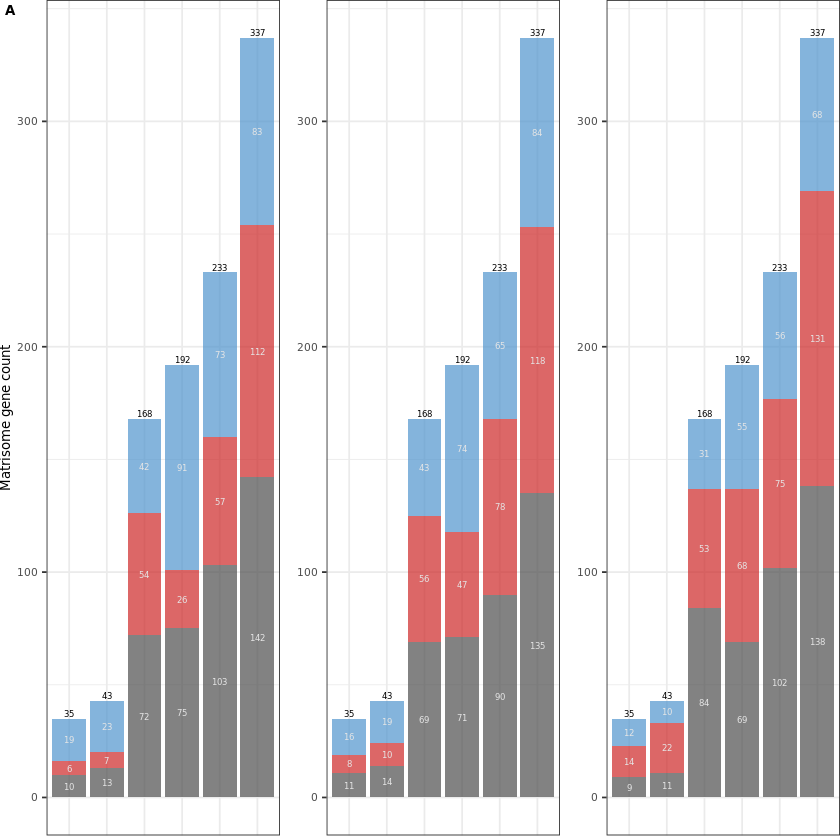

In [7]:
mat_de_bplot_list <- c(
    mget("CESC_mat_de_bplot"),
    c(mget("UCEC_mat_de_bplot"), mget("UCS_mat_de_bplot")) %>%
        purrr::map(function(p) { hide_axis_title(p, "y") })
) %>%
    purrr::map(hide_legend) %>%
    purrr::map(function(p) { set_margins(p, c(0.0, 0, 0, 0)) }) %>%
    purrr::map(function(p) { hide_axis_text(p, "x") })


mat_de_bplots <- plot_grid(
    plotlist = mat_de_bplot_list,
    ncol = 3,
#     labels = c("A", "B", "C"),
    labels = c("A"),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    align = "vh"
)

# mat_de_bplots

mat_de_bplot_legend <- get_legend(CESC_mat_de_bplot + theme(legend.position = "bottom", legend.spacing.x = unit(0.4, 'cm')))

# mat_de_bplot_grid <- plot_grid(mat_de_bplots, mat_de_bplot_legend, ncol = 1, rel_heights = c(1, 0.15))
mat_de_bplot_grid <- plot_grid(mat_de_bplots, ncol = 1)
mat_de_bplot_grid

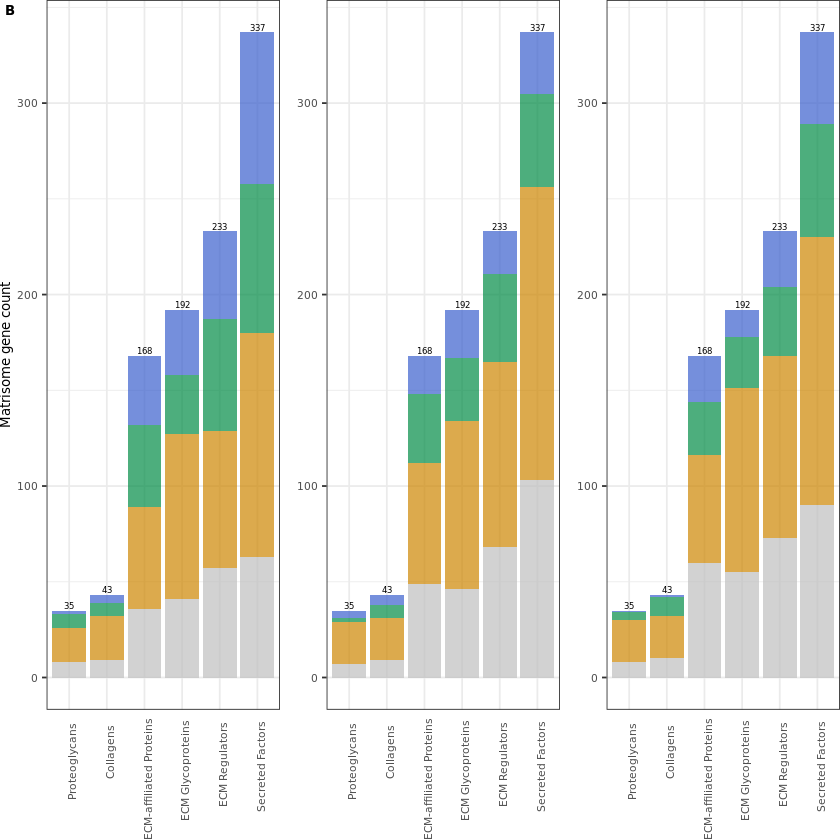

In [8]:
mat_sig_bplot_list <- c(
    mget("CESC_mat_sig_bplot"),
    mget("UCEC_mat_sig_bplot") %>% purrr::map(function(p) { hide_axis_title(p, "y") }),
    mget("UCS_mat_sig_bplot") %>% purrr::map(function(p) { hide_axis_title(p, "y") })
) %>%
    purrr::map(hide_legend) %>%
    purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0)) })

mat_sig_bplots <- plot_grid(
    plotlist = mat_sig_bplot_list,
    ncol = 3,
#     labels = c("D", "E", "F"),
    labels = c("B"),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    align = "vh"
)
mat_sig_bplot_legend <- get_legend(CESC_mat_sig_bplot + theme(legend.position = "bottom", legend.spacing.x = unit(0.4, 'cm')))

# legend.spacing.x = unit(1.0, 'cm')

# mat_sig_bplot_grid <- plot_grid(mat_sig_bplots, mat_sig_bplot_legend, ncol = 1, rel_heights = c(1, 0.15))
mat_sig_bplot_grid <- plot_grid(mat_sig_bplots, ncol = 1)
mat_sig_bplot_grid

Warning message in as_grob.default(plot):
"Cannot convert object of class character into a grob."


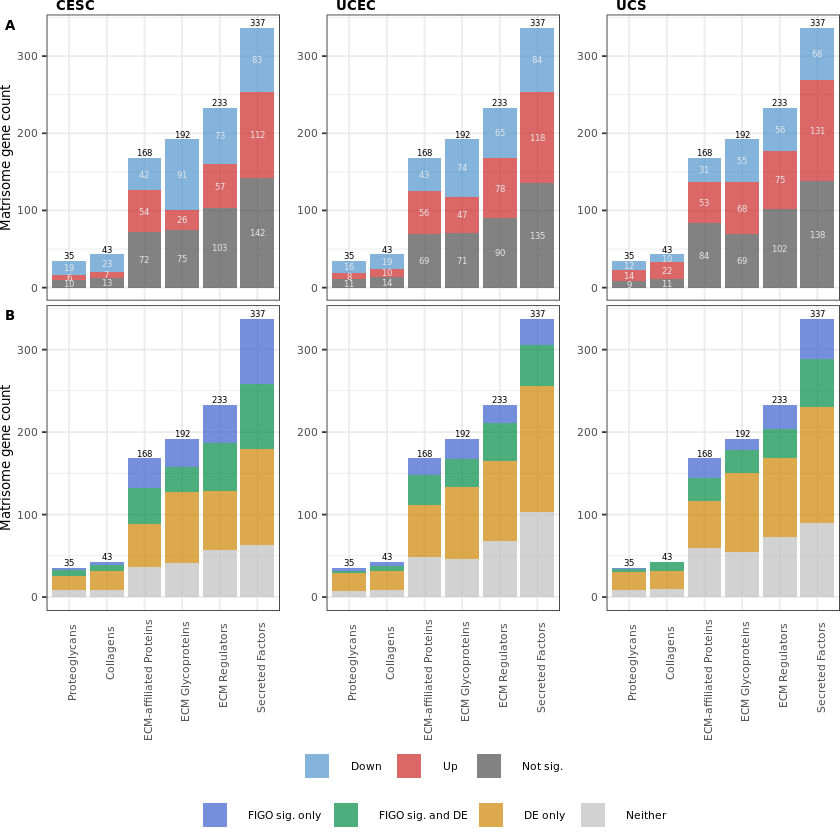

In [9]:
fig2 <- plot_grid(
#     plot_grid(NULL, NULL, NULL, ncol = 3, labels = c("Cervical cancer", "Endometrial cancer", "Uterine carcinosarcoma"), label_font_family = family, label_size = text_size, label_fontface = "bold", hjust = 0, vjust = 1, label_x = 0.2),
    plot_grid(NULL, NULL, NULL, ncol = 3, labels = c("CESC", "UCEC", "UCS"), label_font_family = family, label_size = text_size, label_fontface = "bold", hjust = 0, vjust = 1, label_x = 0.2),
    mat_de_bplot_grid,
    mat_sig_bplot_grid,
    mat_de_bplot_legend,
    mat_sig_bplot_legend,
#     vplot_grid + theme(plot.margin = unit(c(0, 0, 0.25, 0), "cm")),
#     ea_goplots,
    ncol = 1,
#     rel_heights = c(1, 1.75)
    rel_heights = c(0.05, 1, 1.5, 0.17, 0.17)
)
fig2

In [10]:
ggsave(fig2, filename = paste0(dirs$figures_dir, "/paneled/figure2.png"), dpi = dpi, height = 7, width = 6)